In [1]:
import numpy as np
from numpy import linalg as la
import math
import time
import matplotlib.pyplot as plt

# Exercício 1)

In [2]:
def func_1(A):

  # Inicializando U como uma copia de A e L como uma matriz identidade
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # Iterando nas colunas
  for j in range(n-1):
    # Iterando nas linhas abaixo da diagonal principal
    for i in range(j+1, n):

      # Calcula a entrada em L como o fator de escalonamento
      L[i, j] = U[i, j] / U[j, j]

      # Eliminando as entradas abaixo da diagonal principal em U
      U[i, j:n] = U[i, j:n] - L[i, j] * U[j, j:n]
  return L, U

In [3]:
def func_2(A, p):

  # Inicializando U como uma copia de A e L como uma matriz identidade
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # Iterando nas colunas
  for j in range(n-1):

    # Define v como o mínimo entre o número de linhas da matriz e o
    # alcance definido pelo parâmetro arbitrario 'p'
    v = min(n, j + p + 1)

    # Itera nas linhas abaixo da diagonal principal (limitadas pelo indice v)
    for i in range(j+1, v):

      # Calcula a entrada em L como o fator de escalonamento
      L[i, j] = U[i, j] / U[j, j]

      # Eliminando as entradas abaixo da diagonal principal em U
      U[i, j:v] = U[i, j:v] - L[i, j] * U[j, j:v]
  return L, U

In [4]:
# Exemplo

# Inicializando a matriz e os dados relativos a ela
n = 2000
p = 2
A = np.zeros((n, n))
for i in range(n):
  for j in range(max(0, i - p), min(n, i + p + 1)):
    A[i, j] = np.random.normal()

# Executando a decomposicao LU da funcao 1 e imprimindo seu tempo de duracao
start_time = time.time()
(L, U) = func_1(A)
end_time = time.time()
print("Tempo 1: {}".format(end_time - start_time))

# Executando a decomposicao LU da funcao 2 e imprimindo seu tempo de duracao
start_time = time.time()
(L_, U_) = func_2(A, p)
end_time = time.time()
print("Tempo 2: {}".format(end_time - start_time))

# Imprimindo a norma da diferenca entre o produto de LU e A
print(la.norm(L @ U - A))
print(la.norm(L_ @ U_ - A))

Tempo 1: 6.513768672943115
Tempo 2: 0.014839410781860352
2.78812821693218e-13
2.78812821693218e-13


Ambas as funções enunciadas representam o método de fatoração $LU$ da matriz $A$ fornecida. Em ambos os casos, $L$ e $U$ são inicializadas como uma matriz identidade de dimensões $n$ e uma cópia de $A$, respectivamente. Ademais, ambos os laços constroem as matrizes $L$ e $U$ ao calcular as posições da matriz $L$ $(L[i, j])$ como o fator de escalonamento, posteriormente utilizado para atualizar os valoers da matriz $U$.

No entanto, ambos os métodos apresentam uma diferença relacionada ao processo iterativo da rotina. Nesse contexto, a função 2 não itera nas linhas até o número máximo de linahs da matriz ($n$).

Na função 1, a iteração nas linhas realizada no laço e nas coluans da matriz $U$ é limitada superiormente pelo numero de linhas e colunas da matriz $A$ ($n$), gerando um grande número de iterações. Já no caso da função 2, é definida uma variável $v$ que assume o mínimo valor entre $n$ e $j + p + 1$, sendo a iteração anteriormente descrita limitada superiormente pela variável $v$.

Este sutil ajuste faz com que a função 2 poupe muitas iterações quando comparada com a função 1, conferindo uma melhora significativa em termos de desempenho, resultado que se confirma ao comparar o tempo de execução das duas funcionalidades (como impresso na célula acima).
Todavia, vale destacar que a corretude do método não é sempre garantida, podendo variar para diferentes valores de $p$. No exemplo fornecido contudo, o resultado é sempre correto (como impresso na célula anterior,  $LU - A \to 0$), uma vez que a matriz $A$ é inicialaizada com base no parâmetro $p$, de modo que as entradas que estão fora do alcance da iteração descrita na função 2 sejam inicializadas como nulas, não gerando complicações para o método.

Em síntese, as duas funções fornecem resultados corretos para a decomposição $LU$, no entando a corretude da segunda funcionalidade 2 está associada a configuração da matriz inicial. Apesar disso, a função 2 é uma alternativa interessante em termos de desempenho, uma vez que apresenta uma melhora significativa no tempo de execução ao poupar um grande número de iterações.

# Exercício 2)

In [5]:
def gauss_jacobi(A, b, x, erro):

  # Inicializa D como a matriz diagonal de A
  # C e g são inicializadas conforme descrito pelo metodo de Gauss-Jacobi
  n = A.shape[0]
  D = np.diag(np.diag(A))
  C = np.eye(n) - np.matmul(la.inv(D), A)
  g = np.matmul(la.inv(D), b)
  k_max, k = 10000, 0

  # Vetor de erros utilizado para o plot do grafico
  erros = []

  print("Matriz C e vetor G da Gauss-Jacobi:")
  print(C)
  print(g)

  # Enquanto a solucao nao convergir:
  while(la.norm(b - np.matmul(A, x)) > erro):

    # Calcula a candidata a solucao como descrito no metodo de incrementa k
    x = np.matmul(C, x) + g
    k += 1

    erros.append(la.norm(b - np.matmul(A, x)))

    # Caso o limite de iteracoes seja atingido, interrompe o processo
    if(k == k_max):
      print("Limite de iteracoes excecido. Sem solucao.")
      break;

  return x, k, erros

In [6]:
def gauss_seidel(A, b, x, erro):

    # Inicializa L e U como a matriz triangular
    # inferior e superior de A, respectivamente
    # C e g são inicializadas conforme descrito pelo metodo de Gauss-Seidel
    L = np.tril(A)
    R = np.triu(A, 1)
    C = np.matmul((-1 * la.inv(L)), R)
    g = np.matmul(la.inv(L), b)
    k_max, k = 10000, 0

    # Vetor de erros utilizado para o plot do grafico
    erros = []

    print("Matriz C e vetor G da Gauss-Seidel:")
    print(C)
    print(g)

    # Enquanto a solucao nao convergir:
    while(la.norm(b - np.matmul(A, x)) > erro):

        # Calcula a candidata a solucao como descrito no metodo de incrementa k
        x = np.matmul(C, x) + g
        k += 1

        erros.append(la.norm(b - np.matmul(A, x)))

        # Caso o limite de iteracoes seja atingido, interrompe o processo
        if(k == k_max):
            print("Limite de iteracoes excecido. Sem solucao.")
            break;

    return x, k, erros

Matriz C e vetor G da Gauss-Jacobi:
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]
[-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]
Matriz C e vetor G da Gauss-Seidel:
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.          0.14285714  0.21428571 -0.14285714  0.          0.        ]
 [ 0.         -0.03061224  0.09693878  0.24489796 -0.14285714  0.        ]
 [ 0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [ 0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [ 0.          0.00531029 -0

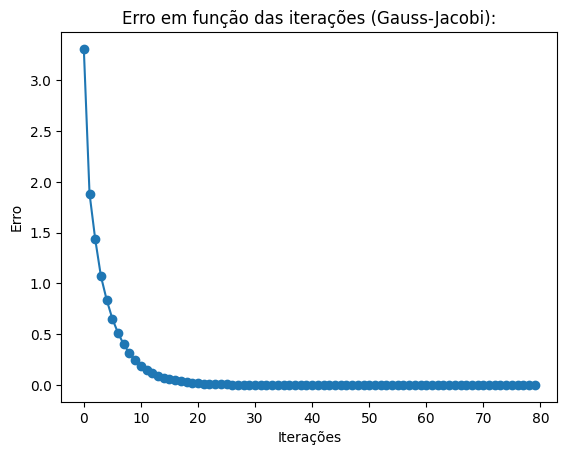

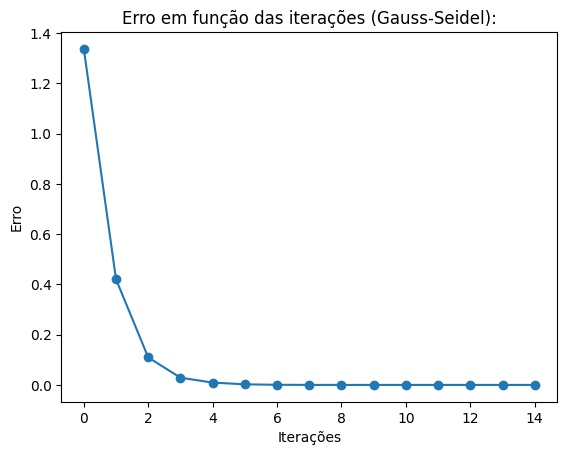

In [7]:
# Exemplo

# Inicializando os dados do problema conforme enunciados
A = np.array([[4, -2, 1, 0, 0, 0],
              [-2, 7, -2, 1, 0, 0],
              [1, -2, 7, -2, 1, 0],
              [0, 1, -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]], dtype='float')

b = np.array([-1, -2, 1, 1, -2, -1], dtype='float')

x0 = np.array([1, 0, 0, 0, 0, 0], dtype='float')

# Calculando a solucao utilizando os metodos de Gauss-Jacobi e Gauss-Seidel
x_jacobi, k_jacobi, erros_jacobi = gauss_jacobi(A, b, x0, 1e-8)
x_seidel, k_seidel, erros_seidel = gauss_seidel(A, b, x0, 1e-8)

# Imprimindo as solucoes encontradas
print("Gauss-Jacobi converge para {} em {} iteracoes.".format(x_jacobi, k_jacobi))
print("Gauss-Seidel converge para {} em {} iteracoes.".format(x_seidel, k_seidel))

# Imprimindo a norma da diferenca entre as solucoes
print("Norma da diferença entre os metodos: {}".format(la.norm(x_jacobi - x_seidel)))

# Plotando os graficos de erro X tempo
plt.plot(range(k_jacobi), erros_jacobi, '-o')
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro em função das iterações (Gauss-Jacobi):')
plt.show()
plt.plot(range(k_seidel), erros_seidel, '-o')
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro em função das iterações (Gauss-Seidel):')
plt.show()

## a)

No método de Gauss-Jacobi, sabemos que a matriz $C$ e o vetor $g$ são dados por:

$C = I - D^{-1}A$

$g = D^{-1}b$

Em que $D$ é uma matriz diagonal inicializada com a diagonal principal de $A$ e $I$ é a matriz identidade.

Já no método de Gauss-Seidel, os mesmos elementos são calculados como:

$C = L^{-1}R$

$g = L^{-1}b$

Em que $L$ é uma matriz triangular inferior inicializada com as entradas de $A$ e $U$ é uma matriz triangular superior inicializada com as entradas de $A$ (com exceção dos elementos da diagonal principal, que são nulos em $U$).

Para realizar tais cálculos, foram utilizadas as seguintes funções da bibliotecaa *numpy*:

*   **eye()**: Gera uma matriz identidade;
*   **matmul()**: Calcula a multiplicação entre duas matrizes;
*  **inv()**: Retorna a inversa de uma

Tanto no método *gauss_jacobi()* como *gauss_seidel()* as matrizes são impressas na tela após serem calculadas, o resultado é então visível ao compilar e executar a célula acima.


## b)

Para analisar a convergência dos métodos abordados, pode-se verificar que a matriz $A$ fornecida é **diagonal dominante**. Ou seja:

$$\ \frac{\sum_{j \neq i} |a_{ij}|}{|a_{ii}|} < 1 <=> |a_{ii}| > \sum_{j \neq i} |a_{ij}|, \text{ para todo } i \neq j$$

Analisando a matriz fornecida linha à linha:

* $i = 1: |4| > |-2| + |1| => 4 > 3; verdadeiro$
* $i = 2: |7| > |-2| + |-2| + |1| => 7 > 5; verdadeiro$
* $i = 3: |7| > |-2| + |-2| + |1| + |1| => 7 > 6; verdadeiro$
* $i = 4: |7| > |-2| + |-2| + |1| + |1| => 7 > 6; verdadeiro$
* $i = 5: |7| > |-2| + |-2| + |1| => 7 > 5; verdadeiro$
* $i = 6: |4| > |-2| + |1| => 4 > 3; verdadeiro$

Logo, a matriz $A$ é **diagonal dominante** e portanto converge tanto para o método de *Gauss-Jacobi* quanto para o método de *Gauss-Seidel*

Analisando os resultados através do código acima, é possível verificar que ambas as funções retornam resultados (vetor $x$) extremamente próximos. De maneira mais específica, a diferença entre os vetores retornados pelas funcionalidades é pouco perceptível e norma da diferença entre os mesmos encontra-se na casa de $10^{-9}$.


## c)

A resolução do sistema, assim como os gráficos solicitados são obtidos através do código desenvolvido nas células acima. Esta resposta portanto limita-se a comentar os resultados obtidos em cada método.

Como explicado no item b), ambos os métodos convergem para o resultado dado que $A$ é diagonal dominante, a convergencia analisada se confirma pelo código implementado. Sendo assim, em termos de corretude, ambos os métodos apresentam um resultado satisfatório para o exemplo fornecido, sendo capaz de resolver o sistema com um erro suficientemente confiável.

Contudo, em termos de desempenho, é notável que o método de *Gauss-Seidel*, ao convergir para o resultado em apenas 15 iterações, apresenta vantagem em relação ao método de *Gauss-Jacobi*, que converge em 81 iterações. A diferença de desempenho de ambas as funções é esperada, uma vez que ao utilizar os valores atualizados da solução candidata ao longo do processo iterativo, o método de *Gauss-Seidel* tende a ajustar a solução de forma mais precisa a cada iteração, acelerando o processo de convergência.

Em conclusão, pode-se inferir que o resultado obtido faz sentido, tendo em vista que ambos os resultados convergem para uma solução aceitáveis (satisfazendo o cálculo do item b). Ademais, a melhora no desempenho esperada por *Gauss-Seidel* ser um método que contempla a otimização de *Gauss-Jacobi* é confirmada pelos testes, dada à discrepância entre o número de iterações e o gráfico de erro em função do tempo.



# Exercício 3)

In [8]:
# Definicao das funcoes utilizadas para a modelagem do problema

def p(x):
  return (-1)*pow(x, 4) + 7.7*pow(x, 3) -18*pow(x, 2) +13.6*x

def dp(x):
  return (-4)*pow(x, 3) + 23.1*pow(x, 2) - 36*x + 13.6

def q(x):
  return (-1)*pow(x, 2) + 5*x +0.75

def dq(x):
  return (-2)*x + 5

def func(x):
  return p(x) - q(x)

def dfunc(x):
  return dp(x) - dq(x)

In [9]:
def bisseccao(f, inf, sup, erro, k_max):

  k = 0
  x = (inf + sup) / 2

  # Enquanto a solucao nao convergir e
  # o numero maximo de iteracoes nao for atingido
  while(abs(f(x)) > erro and k < k_max):

    # Calcula o novo intervalo com base no teorema do valor medio
    if(f(x) * f(inf) < 0):
        sup = x
    else:
        inf = x

    # Atualiza o valor de x e incrementa k
    x = (inf + sup) / 2
    k += 1

  if(k == k_max and abs(f(x)) > erro):
    print("Metodo nao convergiu. Retornando a solucao mais proxima")

  return x, k

In [10]:
def newton(funcoes, x0, erro_tol):

    x = x0
    erro = np.inf
    k_max, k = 1000, 0

    # Enquanto a solucao nao convergir e
    # o numero maximo de iteracoes nao for atingido
    while(erro > erro_tol and k < k_max):
        k += 1

        # Atualiza os valores de x (e o erro) analisados com base no decremento
        # dado pela razao entre a funcao e sua derivada no ponto x
        x0 = x
        dx = funcoes[0](x)/funcoes[1](x)
        x = x - dx
        erro = abs(x-x0)

    return x, k

In [11]:
print("Metodo da bisseccao com chute inicial em [3, 3.2]")
x_bis, k_bis = bisseccao(func, 3, 3.2, 1e-3, 5)
print("H = {} em {} iteracoes".format(p(x_bis), k_bis))

print("Metodo da bisseccao com chute inicial em [3.17, 3.19]")
x_bis, k_bis = bisseccao(func, 3.17, 3.19, 1e-3, 5)
print("H = {} em {} iteracoes".format(p(x_bis), k_bis))

print("Metodo de Newton com chute inicial x0 = 3.2")
x_new, k_new = newton([func, dfunc], 3.2, 1e-3)
print("H = {} em {} iteracoes".format(p(x_new), k_new))


Metodo da bisseccao com chute inicial em [3, 3.2]
Metodo nao convergiu. Retornando a solucao mais proxima
H = 6.542846429347982 em 5 iteracoes
Metodo da bisseccao com chute inicial em [3.17, 3.19]
H = 6.54675177875518 em 5 iteracoes
Metodo de Newton com chute inicial x0 = 3.2
H = 6.5471824949630175 em 2 iteracoes


## a)

Implementação da resolução nas células de código acima.

## b)

Implementação da resolução nas células de código acima.

### Método da Bissecção:

O método da *bissecção* se baseia na busca por raízes através do teorema do valor intermediário, cujo qual define que: Dada uma função contínua em um intervalo [a, b], existe ao menos uma raíz contida neste intervalo.

Na implementação acima, é realizada uma iteração até que o limite máximo de iterações seja atingido ou até que o método convirja para uma solução aceitável. No processo iterativo, a variável **x** é atualizada como o ponto médio do intervalo **[a, b]**, na sequência, um dos extremos do intervalo é atualizado com o valor de **x**, de modo que a propriedade do teorema do valor médio seja preservada, finalmente incrementa-se **k**.

### Método de Newton:

O método de *Newton*, por sua vez, se baseia na ideia de aproximar a raíz da função através da intersecção da reta tangente à função analisada. A cada iteração a reta tangente é atualizada com base na derivada da função à ser aproximada.
Em termos de restrição, basta que a função seja diferenciável no intervalo de iteração ao qual ela é submetida. Como funções polinomiais são de classe $C(n)$, o método de *Newton* pode ser aplicado.

A implementação acima utiliza o método de *Newton* com critério de parada relativo ao **erro absoluto**, nela realiza-se uma iteração até que o limite máximo de iterações seja atingido ou até que o método convirja para uma solução satisfatória. Neste processo iterativo, o valor de **x** é atualizado e o decremento é calculado como a razão entre a função e sua derivada no ponto **x**, na sequência, decrementa-se **x** com o valor anteriormente calculado e **k** é incrementada.

### Resultados:

Em termos de resultado, ambos os métodos apresentam resultados relativamente próximos, cerca de $6.54 u.a.$ para a altura da intersecção. Contudo, dada as expecificações fornecidas, somente o método de Newton convergiu em um tempo satisfatório.

No caso do método da *bissecção*, a melhor estimativa possível (de acordo com o gráfico fornecido) é $[3, 3.2]$ para o chute inicial, o que nos fornece $x0 = 3.1$ e um erro inicial de aproximadamente $0.4214$.

Realizando as iterações temos:
* $k = 1: x = 3.10000, Erro = 0.42139999999998956 > 10^{-3} $
* $k = 2: x = 3.15000, Erro = 0.12826874999997350 > 10^{-3} $
* $k = 3: x = 3.17500, Erro = 0.01145429687505306 > 10^{-3} $
* $k = 4: x = 3.16250, Erro = 0.05778928222658131 > 10^{-3} $
* $k = 5: x = 3.16875, Erro = 0.02300937652588253 > 10^{-3} $

Logo, percebe-se que o resultado atingido pelo método da *bissecção* não é satisfatório dadas as condições enunciadas.

Foram realizados testes empíricos para encontrar um chute inicial que levasse o método da *bissecção* ao resultado ideal. O intervalo encontrado foi $[3.17, 3.19]$ (como mostrado na célula de código), que leva à uma convergência em 5 iterações.

Já para o método de *Newton* constatou-se uma convergência bastante acelerada, sendo a aproximação da raiz encontrada em apenas 2 iterações. Foi utilizada a melhor aproximação possível para o chute inicial (dado o gráfico) $x0 = 3.2$, que foi suficiente para a convergência do método.